### Student Information
Name:鄭竹淇

Student ID:109020032

GitHub ID:gigi-igig

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__.

#import package and set the path

In [ ]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import random
import nltk
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
from sklearn.preprocessing import binarize
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import make_classification
from sklearn.naive_bayes import MultinomialNB
from mpl_toolkits.mplot3d import axes3d

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#the path from colab
import sys
from google.colab import drive
drive.mount('/content/drive')
sys.path.append('/content/drive//My Drive/data mining/DM2023-Lab1-Master-main')
import helpers.data_mining_helpers as dmh

Mounted at /content/drive


In [ ]:
color1 = ['#F4606c', '#D1BA74', '#BEADFA', '#FAAB78', '#AACB73', '#A4907C']
color2 = ['#ECAD9E', '#E6CEAC', '#D0BFFF', '#FFD495', '#CDE990', '#C8B6A6']

# Take home

In [ ]:
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories,shuffle=True, random_state=42)
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

## Exercise 2 (take home)
 Experiment with other querying techniques using pandas dataframes. Refer to their documentation for more information.

In [ ]:
np.where(X["category"]==0)

(array([  12,   13,   17,   19,   21,   36,   37,   38,   41,   45,   52,
          53,   58,   60,   67,   72,   74,   78,   86,   90,   95,   99,
         100,  102,  105,  108,  119,  120,  122,  125,  128,  129,  130,
         140,  153,  154,  158,  164,  165,  169,  178,  187,  190,  194,
         197,  210,  211,  219,  234,  236,  242,  245,  250,  253,  254,
         258,  259,  265,  273,  276,  288,  290,  291,  296,  300,  305,
         308,  311,  317,  319,  326,  328,  345,  346,  348,  354,  365,
         381,  386,  388,  395,  396,  403,  407,  416,  421,  423,  425,
         426,  430,  431,  437,  441,  446,  451,  455,  456,  464,  465,
         470,  474,  475,  478,  481,  488,  500,  504,  507,  516,  520,
         523,  525,  530,  535,  539,  548,  549,  552,  553,  569,  573,
         576,  579,  584,  586,  589,  592,  597,  600,  603,  607,  615,
         617,  632,  634,  638,  648,  652,  654,  664,  666,  670,  674,
         682,  685,  697,  700,  704, 

## Exercise 5 (take home)
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [ ]:
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },{ 'id': 'B'},{ 'id': 'C', 'missing_example': 'NaN'  },{ 'id': 'D', 'missing_example': 'None' },{ 'id': 'E', 'missing_example':  None  },{ 'id': 'F', 'missing_example': ''     }]
NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
display(NA_df)
NA_df['missing_example'].isnull()

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [ ]:
#isnull() will check None or numpy.NaN, empty strings '' or numpy.inf are not considered NA values
#A:True, because "missing_example" is np.nan.
#B:True, because "missing_example" didn't have value.
#C:False, because "missing_example"="NaN", which is a string.
#D:True, because "missing_example"="None", whcih is an object.
#E:False, because "missing_example"=''

## Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [ ]:
X_sample = X.sample(n=1000,random_state=42) #random state
display(X[0:1])
display(X_sample[0:1])

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics


,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med


In [ ]:
print("X.loc[561].name: ",X.loc[561].name, " VS X_sample.loc[561].name: ", X_sample.loc[561].name)
print("X.iloc[561].name:",X.iloc[561].name," VS X_sample.iloc[561].name:", X_sample.iloc[561].name)

X.loc[561].name:  561  VS X_sample.loc[561].name:  561
X.iloc[561].name: 561  VS X_sample.iloc[561].name: 786


In [ ]:
#X_sample index didn't start from 0.
#loc() function is the same,
#but iloc() function is different, because iloc() is query by new index(not orignal one)

##Exercise 8 (take home):
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for.

sci.med                   277
soc.religion.christian    270
comp.graphics             247
alt.atheism               206
Name: category_name, dtype: int64

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64

,X,X_sample
soc.religion.christian,599,270
sci.med,594,277
comp.graphics,584,247
alt.atheism,480,206


<Axes: title={'center': 'Category distribution'}>

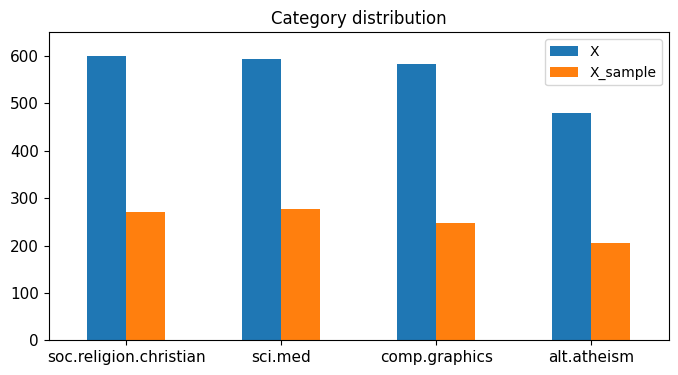

In [ ]:
l1 = X_sample.category_name.value_counts()
l2 = X.category_name.value_counts()
display(l1,l2)
df = pd.concat([l2,l1], axis=1, join="inner")
df.columns = ['X', 'X_sample']
display(df)
df.plot(kind = 'bar', title = 'Category distribution', ylim = [0, 650], rot = 0, fontsize = 11, figsize = (8,4))

##Exercise 10 (take home):
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [ ]:
count_vect = CountVectorizer()
# learn the vocabulary and return document-term matrix
X_counts = count_vect.fit_transform(X.text)
id_array=np.where(X_counts[4, 0:100].toarray()[0]==1)[0]
# id_array[1]=37, second 1 is on [4][37]
print(count_vect.get_feature_names_out()[id_array][1])

01


## Exercise 11 (take home):
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

the high-frequency words in document_1 to document_20: ['amjad' 'and' 'edu' 'the' 'to' 'virtual' 'will' 'you']


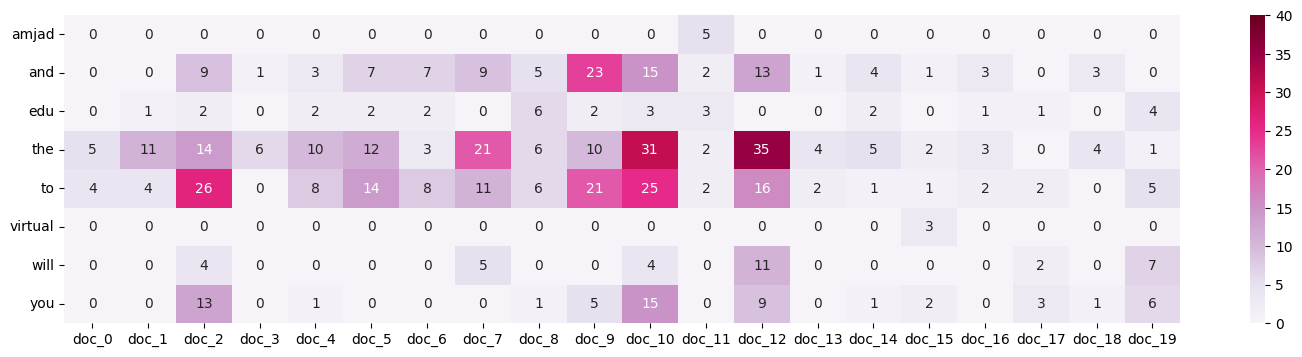

In [ ]:
# take highest frequency word from document_1 to document_20
freq_m = X_counts.argmax(axis=1)[0:20]
freq_most = np.unique(freq_m, axis=0).squeeze()
freq_name=count_vect.get_feature_names_out()[freq_most]
print("the high-frequency words in document_1 to document_20:", freq_name)

# crate the dafatframe of frequency with words
plot_x = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, freq_most].toarray()
df_todraw = pd.DataFrame(np.transpose(plot_z), columns = plot_x, index = freq_name)

# plot
plt.subplots(figsize=(18, 4))
sns.heatmap(df_todraw, cmap="PuRd",vmin=0, vmax=40, annot=True)
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.show()

## Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [ ]:
col = ['red', 'blue', 'black', 'orange']

the shape after PCA:  (2257, 2)


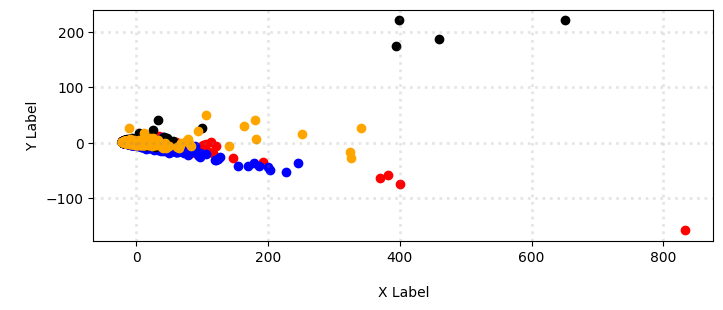

In [ ]:
# 2D PCA
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
print("the shape after PCA: ", X_reduced.shape)

# plot
fig = plt.figure(figsize = (8,3))
ax = fig.subplots()
for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

the shape after PCA:  (2257, 3)


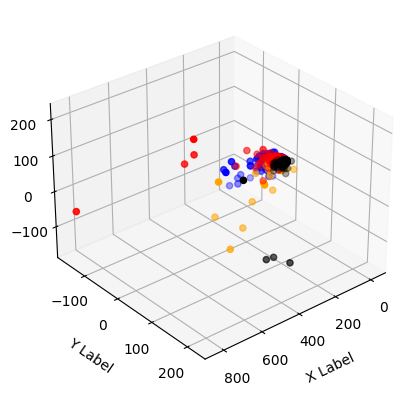

In [ ]:
# 3D PCA
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
print("the shape after PCA: ", X_reduced.shape)

# plot
ax = plt.axes(projection='3d')
for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax.scatter3D(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
# change angle
ax.view_init(30, 50)
plt.show()

##Exercise 13 (take home):
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

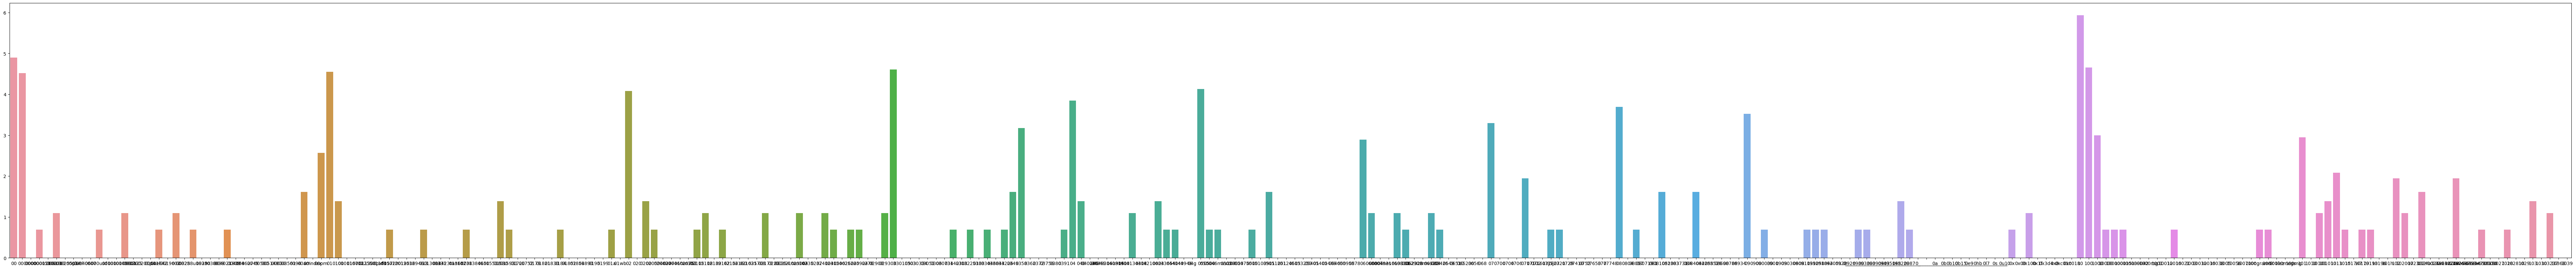

In [ ]:
# plot the log(frequency) for first 300 words frequency
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], y=[math.log(x) for x in term_frequencies[:300]])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 0, fontsize=10);

## Exercise 14 (take home):
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.


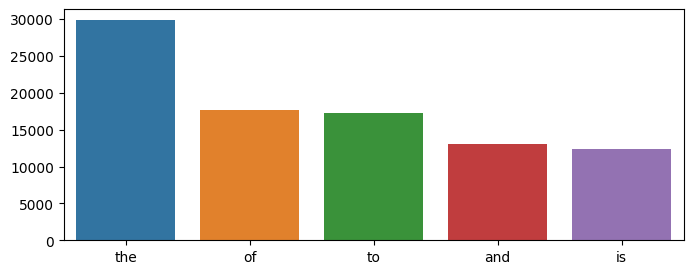

In [ ]:
# plot the top 5 high-frequency words
max_freq_id=np.argsort(-term_frequencies)[:5]
plt.subplots(figsize=(8, 3))
g = sns.barplot(x=count_vect.get_feature_names_out()[max_freq_id], y=term_frequencies[max_freq_id])
g.set_xticklabels(count_vect.get_feature_names_out()[max_freq_id], rotation = 0, fontsize=10);

##Exercise 15 (take home):
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

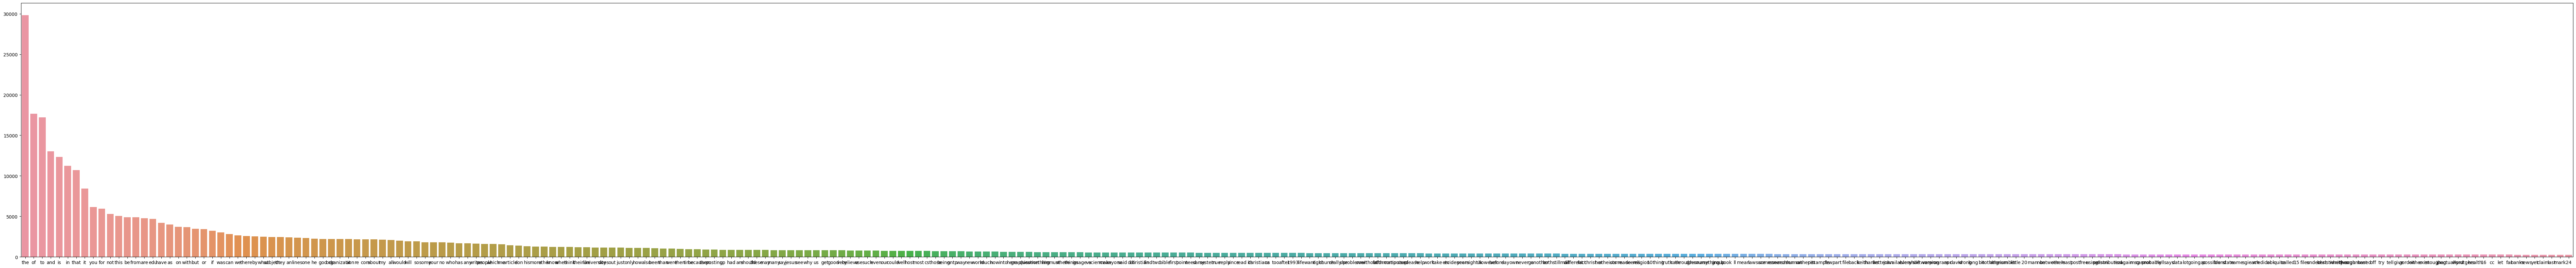

In [ ]:
# plot the long tail
freq_id=np.argsort(-term_frequencies)[:300]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[freq_id], y=term_frequencies[freq_id])
g.set_xticklabels(count_vect.get_feature_names_out()[freq_id], rotation = 0, fontsize=10);

##Exercise 16 (take home):
Try to generate the binarization using the `category_name` column instead. Does it work?

In [ ]:
# no, input of mlb.fit() function need be int type

# New dataset

##part2

###load data and merge(add column)

In [ ]:
path='/content/drive//My Drive/data mining/DM2023-Lab1-Master-main/Homework/'
label_name=["yelp", "imdb", "amazon_cells"]
files_record=[]
for name in label_name:
  with open(path+name+'_labelled.txt') as f:
    files_record.append(f.readlines())
    f.close()

In [ ]:
total_old=[]
for i, lines in enumerate(files_record):
  for line in lines:
    line=line.strip()
    line=line.split('\t',1)
    total_old.append([line[0], int(line[1]), label_name[i], i+1])
total_old=pd.DataFrame(total_old, columns=["text","score","label_name","label"])

In [ ]:
print(len(total_old))
total_old[total_old['label_name']=='yelp'].iloc[::10][:5]

3000


,text,score,label_name,label
0,Wow... Loved this place.,1,yelp,1
10,Service was very prompt.,1,yelp,1
20,The Burrittos Blah!,0,yelp,1
30,"Also there are combos like a burger, fries, an...",1,yelp,1
40,The shrimp tender and moist.,1,yelp,1


###Missing value and Dupllicates value

In [ ]:
# deal with missing value
missing_record=total_old.isnull().apply(lambda x: dmh.check_missing_values(x))
display(missing_record)

,text,score,label_name,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


In [ ]:
# deal with dupllicates value
print("before drop")
print("there are", sum(total_old.duplicated()), "data duplicate")
display(total_old.groupby("score").label_name.value_counts().sort_index())
total_data=total_old.drop_duplicates(keep=False, inplace=False)
print("\n after drop")
print("there are", sum(total_data.duplicated()), "data duplicate")
display(total_data.groupby("score").label_name.value_counts().sort_index())

before drop
there are 17 data duplicate


score  label_name  
0      amazon_cells    500
       imdb            500
       yelp            500
1      amazon_cells    500
       imdb            500
       yelp            500
Name: label_name, dtype: int64


 after drop
there are 0 data duplicate


score  label_name  
0      amazon_cells    494
       imdb            498
       yelp            494
1      amazon_cells    486
       imdb            496
       yelp            498
Name: label_name, dtype: int64

In [ ]:
print(len(total_data))

2966


###random

In [ ]:
display(total_data)
total_data = total_data.sample(frac=1, random_state=42).reset_index(drop=True)
display(total_data)

,text,score,label_name,label
0,Wow... Loved this place.,1,yelp,1
1,Crust is not good.,0,yelp,1
2,Not tasty and the texture was just nasty.,0,yelp,1
3,Stopped by during the late May bank holiday of...,1,yelp,1
4,The selection on the menu was great and so wer...,1,yelp,1
...,...,...,...,...
2995,The screen does get smudged easily because it ...,0,amazon_cells,3
2996,What a piece of junk.. I lose more calls on th...,0,amazon_cells,3
2997,Item Does Not Match Picture.,0,amazon_cells,3
2998,The only thing that disappoint me is the infra...,0,amazon_cells,3


,text,score,label_name,label
0,The plastic breaks really easy on this clip.,0,amazon_cells,3
1,Mediocre food.,0,yelp,1
2,This is one of the worst Sandra Bullock movie ...,0,imdb,2
3,"We had fantastic service, and were pleased by ...",1,yelp,1
4,The case is great and works fine with the 680.,1,amazon_cells,3
...,...,...,...,...
2961,"The acting is fantastic, the stories are seaml...",1,imdb,2
2962,Too politically correct.,0,imdb,2
2963,These are the central themes of the film and t...,0,imdb,2
2964,"his performance, as awarded, was stunning.",1,imdb,2


###smapling

,id_org,text,score,label_name,label
0,2395,"In summary, this was a largely disappointing d...",0,yelp,1
1,794,Pretty awesome place.,1,yelp,1
2,1894,Ray Charles is legendary.,1,imdb,2
3,332,I must say I have taped most of the episodes a...,1,imdb,2
4,2023,All in all an excellent restaurant highlighted...,1,yelp,1
...,...,...,...,...,...
295,1480,Go watch it!,1,imdb,2
296,1674,"I won't spoil it, but the ending in pretty ama...",1,imdb,2
297,1236,I guess I liked the details of his dysfunction...,1,imdb,2
298,402,Go To Place for Gyros.,1,yelp,1


<Axes: title={'center': 'Category distribution'}>

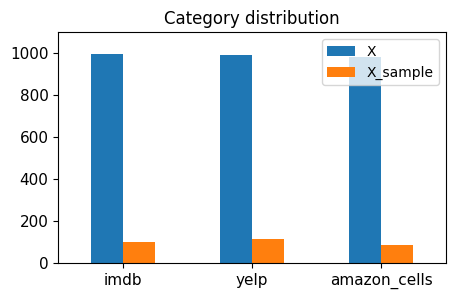

In [ ]:
sample_data = total_data.sample(n=300, random_state=42).reset_index(names=['id_org']) #random state
display(sample_data)
# plot
df = pd.concat([ total_data.label_name.value_counts() , sample_data.label_name.value_counts()], axis=1, join="inner")
df.columns = ['X', 'X_sample']
df.plot(kind = 'bar', title = 'Category distribution', ylim = [0, 1100], rot = 0, fontsize = 11, figsize = (5,3))

###data preprocessing

####feature create (CountVectorizer)

In [ ]:
total_data['unigrams'] = total_data['text'].apply(lambda x: dmh.tokenize_text(x))

In [ ]:
display(total_data[:3])

,text,score,label_name,label,unigrams
0,The plastic breaks really easy on this clip.,0,amazon_cells,3,"[The, plastic, breaks, really, easy, on, this,..."
1,Mediocre food.,0,yelp,1,"[Mediocre, food, .]"
2,This is one of the worst Sandra Bullock movie ...,0,imdb,2,"[This, is, one, of, the, worst, Sandra, Bulloc..."


In [ ]:
count_vect = CountVectorizer()
data_counts = count_vect.fit_transform(total_data.text) #learn the vocabulary and return document-term matrix
analyze = count_vect.build_analyzer()

In [ ]:
print("the shape of countvector data:", data_counts.shape)
print(data_counts[1], "FINISH!\n")
count_vect.get_feature_names_out()[10]

the shape of countvector data: (2966, 5153)
  (0, 2825)	1
  (0, 1821)	1 FINISH!



'18'

In [ ]:
display(total_data.loc[2].text)
analyze(total_data.loc[2].text)

'This is one of the worst Sandra Bullock movie since Speed 2 But not quite that bad.  '

['this',
 'is',
 'one',
 'of',
 'the',
 'worst',
 'sandra',
 'bullock',
 'movie',
 'since',
 'speed',
 'but',
 'not',
 'quite',
 'that',
 'bad']

####subset select

,term_00,term_10,term_100,term_11,term_12,term_13,term_15,term_15g,term_15pm,term_17,term_18,term_18th,term_1928,term_1947,term_1948,term_1949,term_1971,term_1973,term_1979,term_1980
doc_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


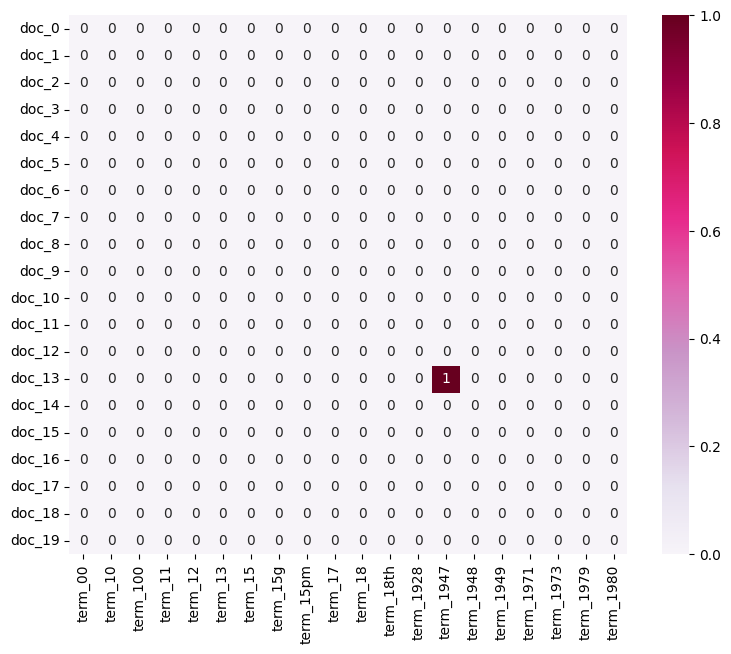

In [ ]:
# take subset from first 20 documents with first 20 words
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(total_data.index)[0:20]]
plot_z = data_counts[0:20, 0:20].toarray()
df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=True)

####dimension reduce

In [ ]:
col = ['black', 'orange', 'blue']
# 2D PCA
data_reduced = PCA(n_components = 2).fit_transform(data_counts.toarray())
print("the shape of 2D PCA:", data_reduced.shape)

the shape of 2D PCA: (2966, 2)


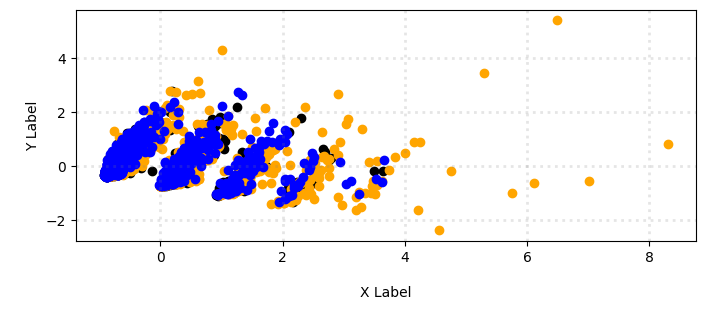

In [ ]:
# plot 2D PCA with label_name
fig = plt.figure(figsize = (8,3))
ax = fig.subplots()

for c, labelname in zip(col, label_name):
    xs = data_reduced[total_data['label_name'] == labelname].T[0]
    ys = data_reduced[total_data['label_name'] == labelname].T[1]
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
plt.show()

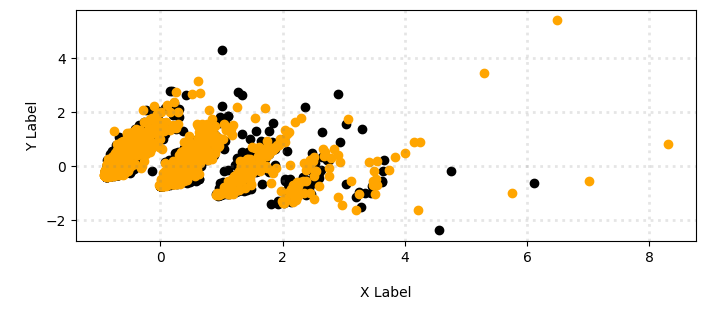

In [ ]:
# plot 2D PCA with score
scores=[0,1]
fig = plt.figure(figsize = (8,3))
ax = fig.subplots()
for c, score in zip(col, scores):
    xs = data_reduced[total_data['score'] == score].T[0]
    ys = data_reduced[total_data['score'] == score].T[1]
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [ ]:
# 3D PCA
data_reduced3d = PCA(n_components = 3).fit_transform(data_counts.toarray())
print("the shape of 3D PCA:", data_reduced3d.shape)

the shape of 3D PCA: (2966, 3)


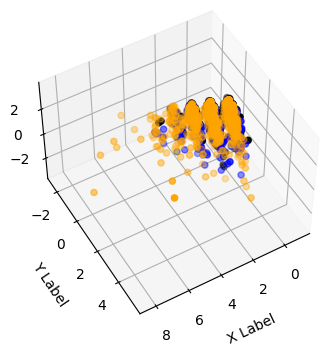

In [ ]:
# plot 3D PCA with label
fig = plt.figure(figsize = (10,4))
ax = plt.axes(projection='3d')
for c, labelname in zip(col, label_name):
    xs = data_reduced3d[total_data['label_name'] == labelname].T[0]
    ys = data_reduced3d[total_data['label_name'] == labelname].T[1]
    zs = data_reduced3d[total_data['label_name'] == labelname].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
# change angle
ax.view_init(50, 60)
plt.show()

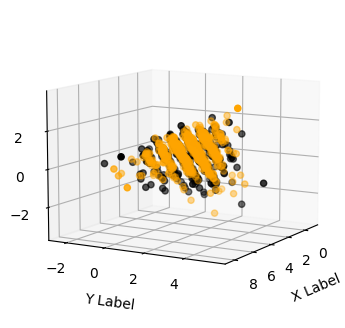

In [ ]:
# plot 3D PCA with score
fig = plt.figure(figsize = (10,4))
ax = plt.axes(projection='3d')
for c, score in zip(col, scores):
    xs = data_reduced3d[total_data['score'] == score].T[0]
    ys = data_reduced3d[total_data['score'] == score].T[1]
    zs = data_reduced3d[total_data['score'] == score].T[2]
    ax.scatter(xs, ys, zs, c =c , marker='o')
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
# change angle
ax.view_init(10, 30)
plt.show()

####Aggregation(frequence of terms)

In [ ]:
term_frequencies = np.asarray(data_counts.sum(axis=0))[0]

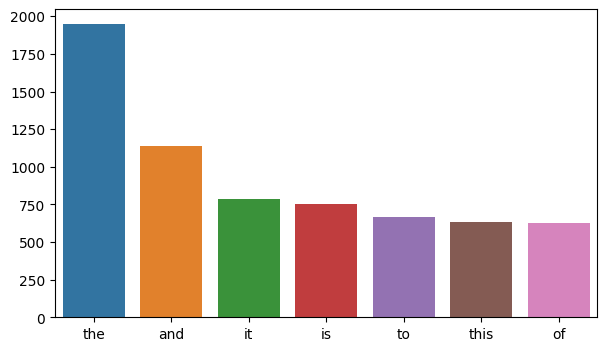

In [ ]:
# plot top 7 high-frequency words
freq_id=np.argsort(-term_frequencies)[:7]
plt.subplots(figsize=(7, 4))
g = sns.barplot(x=count_vect.get_feature_names_out()[freq_id], y=term_frequencies[freq_id])
g.set_xticklabels(count_vect.get_feature_names_out()[freq_id], rotation = 0, fontsize=10);

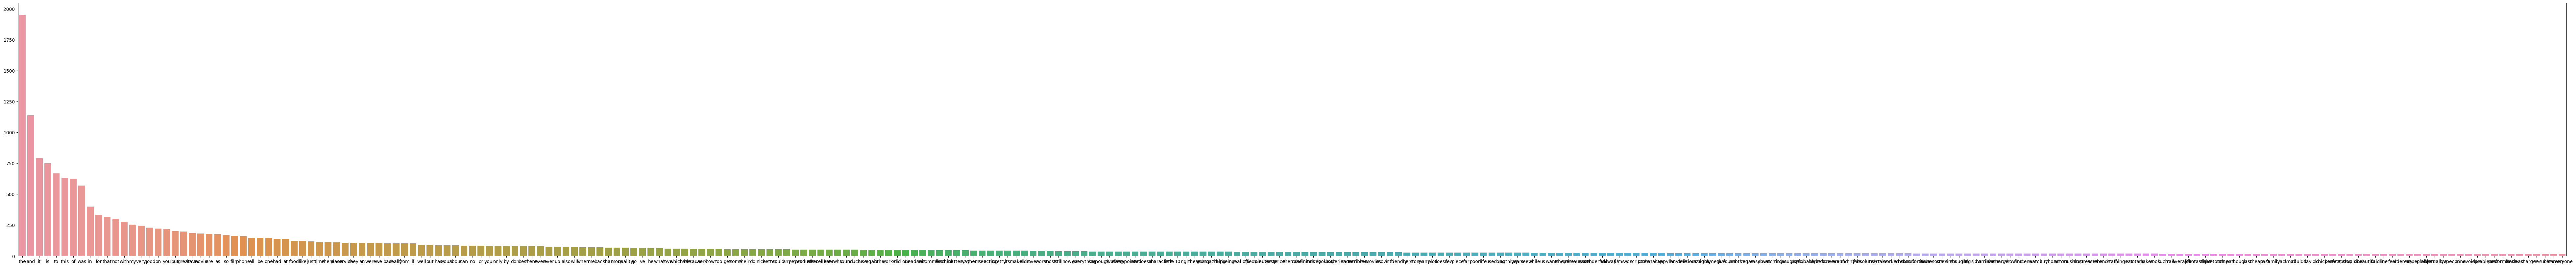

In [ ]:
# plot first 300 words after sort
freq_id=np.argsort(-term_frequencies)[:300]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[freq_id], y=term_frequencies[freq_id])
g.set_xticklabels(count_vect.get_feature_names_out()[freq_id], rotation = 0, fontsize=10);

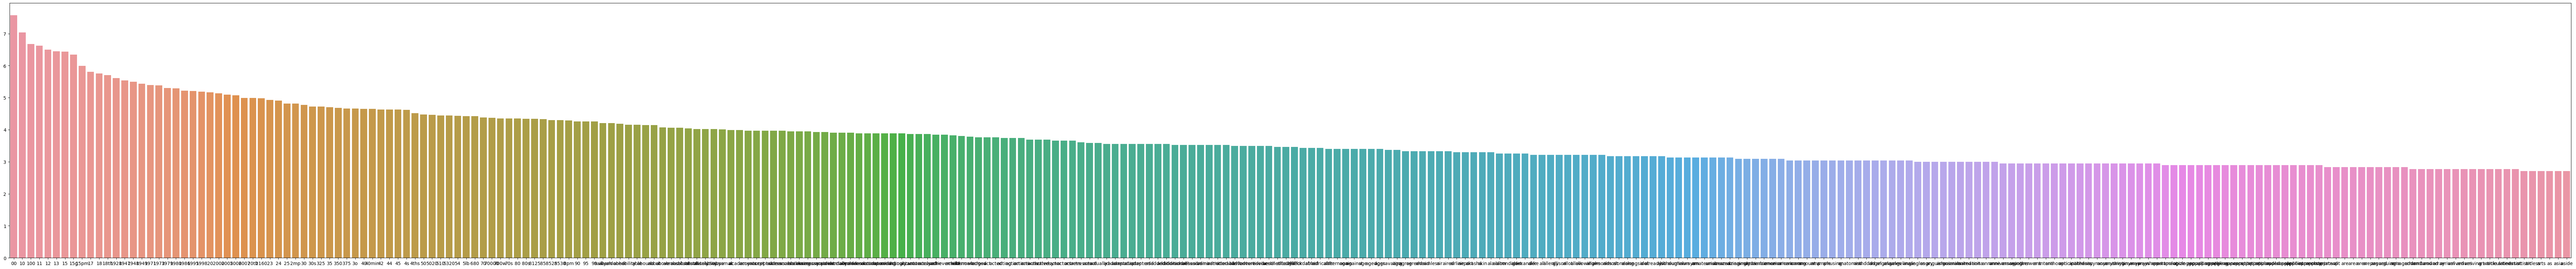

In [ ]:
# plot first 300 words with log()
term_frequencies_log = [math.log(term_frequencies[i]) for i in freq_id]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], y=term_frequencies_log[:300])

####Discretization and Binarization

In [ ]:
# add the bin_label
mlb = preprocessing.LabelBinarizer()
mlb.fit(total_data.label)
total_data['bin_label'] = mlb.transform(total_data['label']).tolist()
display(total_data[0:5])

,text,score,label_name,label,unigrams,bin_label
0,The plastic breaks really easy on this clip.,0,amazon_cells,3,"[The, plastic, breaks, really, easy, on, this,...","[0, 0, 1]"
1,Mediocre food.,0,yelp,1,"[Mediocre, food, .]","[1, 0, 0]"
2,This is one of the worst Sandra Bullock movie ...,0,imdb,2,"[This, is, one, of, the, worst, Sandra, Bulloc...","[0, 1, 0]"
3,"We had fantastic service, and were pleased by ...",1,yelp,1,"[We, had, fantastic, service, ,, and, were, pl...","[1, 0, 0]"
4,The case is great and works fine with the 680.,1,amazon_cells,3,"[The, case, is, great, and, works, fine, with,...","[0, 0, 1]"


In [ ]:
# add the bin_label with sample_data
sample_data['bin_label'] = mlb.transform(sample_data['label']).tolist()
display(sample_data[:5])

,id_org,text,score,label_name,label,bin_label
0,2395,"In summary, this was a largely disappointing d...",0,yelp,1,"[1, 0, 0]"
1,794,Pretty awesome place.,1,yelp,1,"[1, 0, 0]"
2,1894,Ray Charles is legendary.,1,imdb,2,"[0, 1, 0]"
3,332,I must say I have taped most of the episodes a...,1,imdb,2,"[0, 1, 0]"
4,2023,All in all an excellent restaurant highlighted...,1,yelp,1,"[1, 0, 0]"


###data exploration

In [ ]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = total_data.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = total_data.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = total_data.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [ ]:
# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [ ]:
# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.094491
Cosine Similarity using count bw 1 and 3: 0.273861
Cosine Similarity using count bw 2 and 3: 0.069007
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


##part3

###sample distribution

In [ ]:
#count the number of each classification
label_names=["yelp", "imdb", "amazon_cells"]
scores=[0,1]
total_id_list=[]
sample_id_list=[]
new_label=[]
for name in label_names:
  for score in scores:
    total_id_list.append(total_data.index[(total_data.label_name==name) & (total_data.score==score)].tolist())
    sample_id_list.append(sample_data.index[(sample_data.label_name==name) & (sample_data.score==score)].tolist())
    new_label.append(name+' & score:'+str(score))
#get distribution from sample
sample_id=pd.Series(sample_id_list, index=["y0", "y1", "i0", "i1", "a0", "a1"]).to_frame(name="id")
sample_id["name"]=new_label
sample_id["len"]=sample_id["id"].apply(lambda x: len(x))
display(sample_id)
#get distribution from total data
total_id=pd.Series(total_id_list, index=["y0", "y1", "i0", "i1", "a0", "a1"]).to_frame(name="id")
total_id["name"]=new_label
total_id["len"]=total_id["id"].apply(lambda x: len(x))
display(total_id)

,id,name,len
y0,"[0, 9, 11, 12, 25, 33, 43, 45, 46, 50, 60, 61,...",yelp & score:0,55
y1,"[1, 4, 10, 15, 22, 27, 28, 29, 32, 35, 36, 40,...",yelp & score:1,60
i0,"[6, 7, 14, 47, 52, 53, 55, 75, 95, 96, 97, 100...",imdb & score:0,48
i1,"[2, 3, 16, 19, 21, 23, 26, 37, 38, 39, 49, 69,...",imdb & score:1,50
a0,"[13, 18, 34, 41, 42, 51, 54, 56, 58, 65, 66, 7...",amazon_cells & score:0,44
a1,"[5, 8, 17, 20, 24, 30, 31, 44, 67, 77, 78, 83,...",amazon_cells & score:1,43


,id,name,len
y0,"[1, 6, 7, 10, 29, 51, 58, 61, 65, 76, 79, 83, ...",yelp & score:0,494
y1,"[3, 8, 9, 12, 14, 19, 26, 27, 35, 45, 48, 56, ...",yelp & score:1,498
i0,"[2, 5, 21, 23, 30, 32, 33, 36, 44, 46, 47, 57,...",imdb & score:0,498
i1,"[11, 13, 16, 18, 22, 25, 37, 38, 43, 49, 50, 5...",imdb & score:1,496
a0,"[0, 15, 20, 28, 31, 34, 40, 52, 69, 73, 74, 80...",amazon_cells & score:0,494
a1,"[4, 17, 24, 39, 41, 42, 53, 54, 68, 77, 91, 10...",amazon_cells & score:1,486


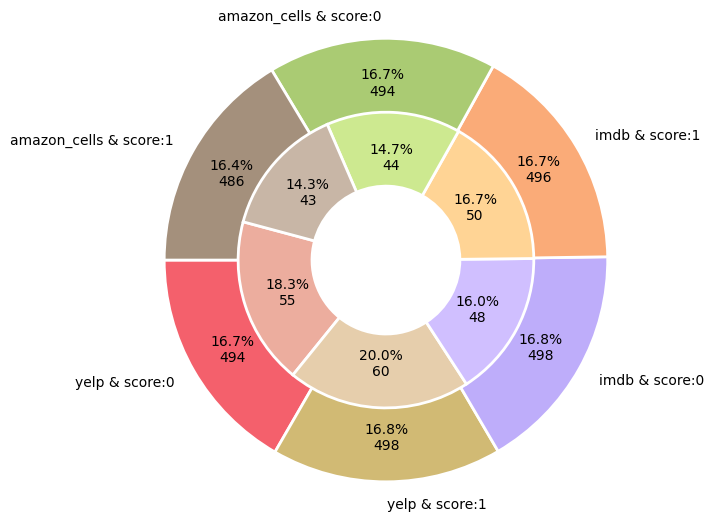

In [ ]:
# pie total
plt.pie(total_id.len, labels=total_id.name, radius=1.5, colors=color1, startangle=180, labeldistance=1.1, pctdistance=0.8,
    autopct=(lambda i: f'{i:.1f}%\n{round(i/100*sum(total_id.len))}' ), wedgeprops={'linewidth':2,'edgecolor':'w','width':1} )
# pie sample
plt.pie(sample_id.len, radius=1, colors=color2, startangle=165, pctdistance=0.7,
    autopct=(lambda i: f'{i:.1f}%\n{round(i/100*sum(sample_id.len))}' ), wedgeprops={'linewidth':2,'edgecolor':'w','width':0.5})
plt.show()

小結論：sample 和 total dataset 對 score 的分佈幾乎一樣


###sample subset select

the shape of data_counts:  (2966, 5153) the shape of sample_counts:  (300, 5153)


Text(0.5, 1.0, 'top 7 words in sample')

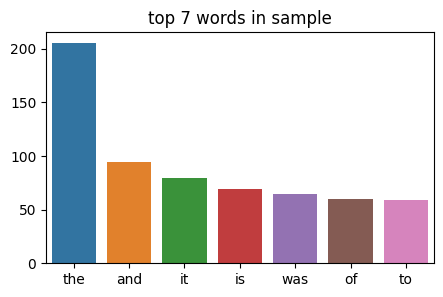

In [ ]:
# make the count vecter from sample data
sample_counts=count_vect.transform(sample_data.text)
print("the shape of data_counts: ", data_counts.shape, "the shape of sample_counts: ", sample_counts.shape)
# make the total frequency of samle
term_freq = np.asarray(sample_counts.sum(axis=0))[0]
max_freq_id=np.argsort(-term_freq)
freq_name=count_vect.get_feature_names_out()[max_freq_id]
# plot the top 7 high-frequency words in sample
plt.subplots(figsize=(5, 3))
g = sns.barplot(x=freq_name[:7], y=term_freq[max_freq_id[:7]])
g.set_xticklabels(freq_name[:7], rotation = 0, fontsize=10);
g.set_title('top 7 words in sample')

###stopword

In [ ]:
# set the stopword
stopword=['about', 'also', 'am', 'and', 'an', 'are', 'at', 'as', 'be', 'been', 'but', 'by', 'can', 'even',
              'for', 'from', 'had', 'has', 'have', 'he', 'here', 'his', 'in','is', 'it',
              'just', 'me', 'my', 'not', 'no', 'of', 'on', 'one', 'or', 'so', 'that', 'the', 'there', 'they', 'this', 'to',
              'very', 'was', 'we', 'were', 'with', 'would', 'you', 'your']
# set a special stopword for negative words
stopword2=['about', 'also', 'am', 'and', 'an', 'are', 'at', 'as', 'be', 'been', 'by', 'can', 'even',
              'for', 'from', 'had', 'has', 'have', 'he', 'here', 'his', 'in','is', 'it',
              'just', 'me', 'my', 'of', 'on', 'one', 'or', 'so', 'that', 'the', 'there', 'they', 'this', 'to',
              'very', 'was', 'we', 'were', 'with', 'would', 'you', 'your']

In [ ]:
def get_name_without_stopword(freq_array, top_num, stopword_type):
  max_freq_id = np.argsort(-freq_array)
  if stopword_type==1:
    stop=stopword
  else:
    stop=stopword2

  max_freq_id_update=[]
  freq_name_update=[]
  for x in max_freq_id:
    term=count_vect.get_feature_names_out()[x]
    if term not in stop:
      max_freq_id_update.append(x)
      freq_name_update.append(term)
    if len(max_freq_id_update)==top_num:
      break
  return (max_freq_id_update, freq_name_update)

Text(0.5, 1.0, 'new top 7 words in sample')

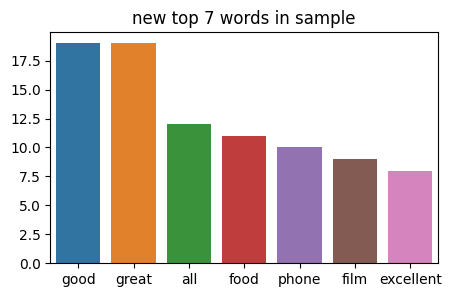

In [ ]:
# plot the top 7 high-frequency words in sample without stopword
max_freq_id_update, freq_name_update = get_name_without_stopword(term_freq, 7, 1)
plt.subplots(figsize=(5, 3))
g = sns.barplot(x=freq_name_update, y=term_freq[max_freq_id_update])
g.set_xticklabels(freq_name_update, rotation = 0, fontsize=10);
g.set_title('new top '+str(len(max_freq_id_update))+' words in sample')

###subset select (label)


In [ ]:
display(sample_id)
display(label_name)

,id,name,len
y0,"[0, 9, 11, 12, 25, 33, 43, 45, 46, 50, 60, 61,...",yelp & score:0,55
y1,"[1, 4, 10, 15, 22, 27, 28, 29, 32, 35, 36, 40,...",yelp & score:1,60
i0,"[6, 7, 14, 47, 52, 53, 55, 75, 95, 96, 97, 100...",imdb & score:0,48
i1,"[2, 3, 16, 19, 21, 23, 26, 37, 38, 39, 49, 69,...",imdb & score:1,50
a0,"[13, 18, 34, 41, 42, 51, 54, 56, 58, 65, 66, 7...",amazon_cells & score:0,44
a1,"[5, 8, 17, 20, 24, 30, 31, 44, 67, 77, 78, 83,...",amazon_cells & score:1,43


['yelp', 'imdb', 'amazon_cells']

In [ ]:
def freq_count(doc_ids, log_or_not, term_ids=[]):
  freq=sample_counts[ doc_ids ,:].sum(axis=0).tolist()[0]
  freq=pd.Series(freq)
  if term_ids != []:
    freq=freq[term_ids]
  if log_or_not == 1:
    freq=[round(math.log(x+1),3) for x in freq]
  return freq

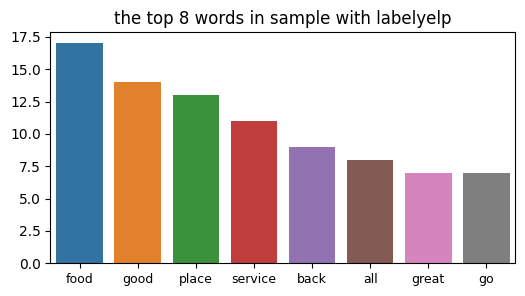

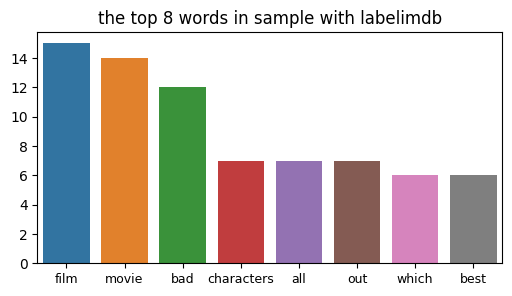

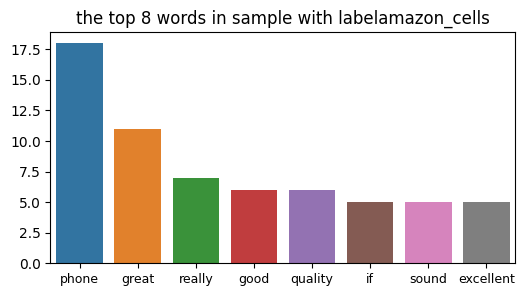

In [ ]:
# plot high_frequency words with different label_name(sample data)
short_name=["y","i","a"]
top_num=8
max_freq_id_label=[]
freq_name_label=[]

for name, short in zip(label_name, short_name):
  new_id_list = sample_id.id[short+"0"] + sample_id.id[short+"1"]
  term_freq = freq_count(new_id_list, log_or_not=0)
  id, f_n = get_name_without_stopword(term_freq, top_num, 1)
  max_freq_id_label.append(id)
  freq_name_label.append(f_n)
  # plot
  plt.subplots(figsize=(6, 3))
  g = sns.barplot(x=f_n, y=term_freq[id])
  g.set_xticklabels(f_n, rotation = 0, fontsize=9);
  g.set_title("the top " +str(top_num)+ " words in sample with label"+ name)

max_freq_id_label = pd.Series(max_freq_id_label, index=short_name)
freq_name_label = pd.Series(freq_name_label, index=short_name)

In [ ]:
# collect the top 5 words in each label
item_name=freq_name_label.y[0:5]+freq_name_label.i[0:5]+freq_name_label.a[0:5]
item_name_id=max_freq_id_label.y[0:5]+max_freq_id_label.i[0:5]+max_freq_id_label.a[0:5]
print("the top 5 words in each label:", item_name)
df=[]
for doc_id in sample_id.id:
  df.append(freq_count(doc_id, log_or_not=1, term_ids=item_name_id))
df_todraw = pd.DataFrame(df, columns = item_name, index = sample_id.name)
display(df_todraw)

the top 5 words in each label: ['food', 'good', 'place', 'service', 'back', 'film', 'movie', 'bad', 'characters', 'all', 'phone', 'great', 'really', 'good', 'quality']


,food,good,place,service,back,film,movie,bad,characters,all,phone,great,really,good,quality
name,,,,,,,,,,,,,,,
yelp & score:0,1.946,1.386,1.946,1.946,1.946,0.000,0.000,0.693,0.000,1.386,0.000,0.000,0.000,1.386,0.000
yelp & score:1,2.485,2.485,2.079,1.792,1.386,0.000,0.000,0.000,0.000,1.792,0.000,2.079,1.099,2.485,0.693
imdb & score:0,0.000,1.386,1.099,0.000,0.000,1.946,2.303,2.565,1.099,1.386,0.000,0.000,0.693,1.386,0.693
imdb & score:1,0.000,1.099,0.000,0.000,0.000,2.303,1.792,0.000,1.792,1.609,0.000,0.693,1.099,1.099,0.000
amazon_cells & score:0,0.000,0.000,0.693,1.099,0.693,0.000,0.000,0.693,0.000,1.099,2.197,0.000,1.609,0.000,1.099
amazon_cells & score:1,0.000,1.946,0.693,0.000,0.000,0.000,0.000,0.000,0.000,1.386,2.398,2.485,1.386,1.946,1.609


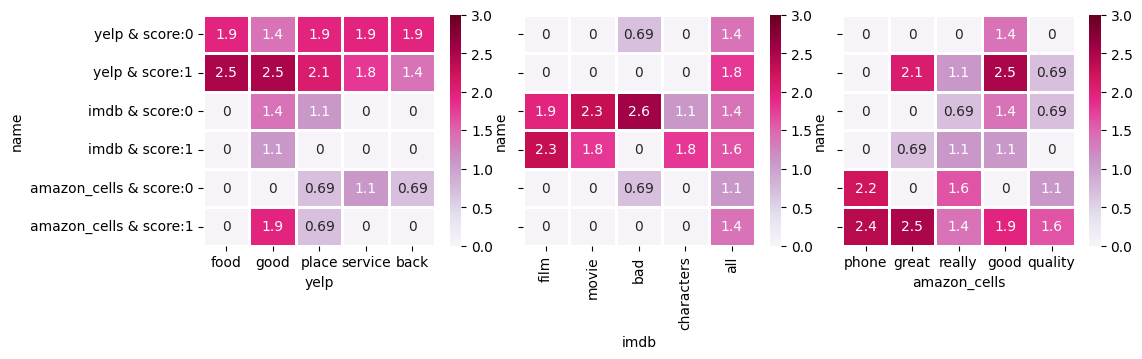

In [ ]:
# plot the heatmap
fig, (yplt, iplt, aplt) = plt.subplots(ncols=3,figsize=(12, 3))
fig.subplots_adjust(wspace=0.1)
sns.heatmap(df_todraw.iloc[:,0:5], cmap="PuRd", ax=yplt, cbar=True, annot=True, linewidths=2, vmax=3)
sns.heatmap(df_todraw.iloc[:,5:10], cmap="PuRd", ax=iplt, cbar=True, annot=True, linewidths=2, vmax=3)
sns.heatmap(df_todraw.iloc[:,10:15], cmap="PuRd", ax=aplt, cbar=True, annot=True, linewidths=2, vmax=3)
iplt.set_yticklabels([])
aplt.set_yticklabels([])
yplt.set_xlabel("yelp")
iplt.set_xlabel("imdb")
aplt.set_xlabel("amazon_cells")
plt.show()

小結論:
From this heatmap, we found that ["food","service","back"] have higher frequence in yelp_data, ["film","movie","characters"] have higher frequence in imdb_data, ["phone"] has higher frequence in amazon_data, ["good","all"] have higher frequence in every database. It might because Yelp was a website about restaurants service, Imdb is a abbreviation from "Internet Movie Database", and Amazon is a online retailer.

###subset select (by score)

In [ ]:
#check the data
print(short_name)
print(scores)
display(sample_id)

['y', 'i', 'a']
[0, 1]


,id,name,len
y0,"[0, 9, 11, 12, 25, 33, 43, 45, 46, 50, 60, 61,...",yelp & score:0,55
y1,"[1, 4, 10, 15, 22, 27, 28, 29, 32, 35, 36, 40,...",yelp & score:1,60
i0,"[6, 7, 14, 47, 52, 53, 55, 75, 95, 96, 97, 100...",imdb & score:0,48
i1,"[2, 3, 16, 19, 21, 23, 26, 37, 38, 39, 49, 69,...",imdb & score:1,50
a0,"[13, 18, 34, 41, 42, 51, 54, 56, 58, 65, 66, 7...",amazon_cells & score:0,44
a1,"[5, 8, 17, 20, 24, 30, 31, 44, 67, 77, 78, 83,...",amazon_cells & score:1,43


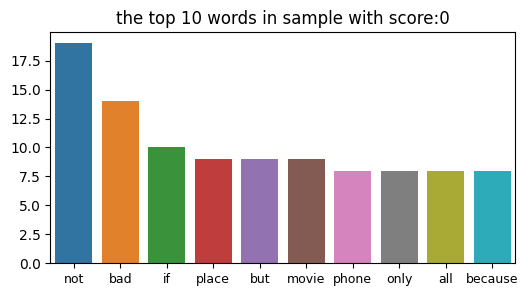

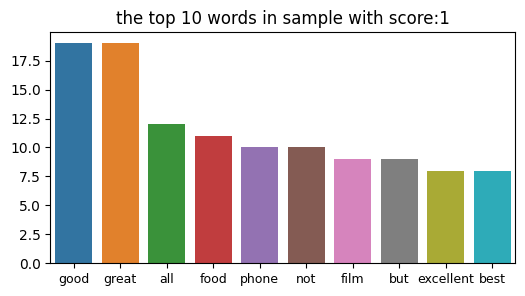

In [ ]:
# plot high_frequency words with different score(sample data)
max_freq_id_score=[]
freq_name_score=[]
term_freq_score=[]
top_num=10

for s in scores:
  new_id_list = sample_id.id["y"+str(s)] + sample_id.id["i"+str(s)] + sample_id.id["a"+str(s)]
  term_freq = freq_count(new_id_list, log_or_not=0)
  term_freq_score.append(term_freq)
  id, f_n = get_name_without_stopword(term_freq, top_num, 2)
  max_freq_id_score.append(id)
  freq_name_score.append(f_n)

  # plot
  plt.subplots(figsize=(6, 3))
  g = sns.barplot(x=f_n, y=term_freq[id])
  g.set_xticklabels(f_n, rotation = 0, fontsize=9);
  g.set_title("the top " +str(top_num)+ " words in sample with score:"+ str(s))

max_freq_id_score = pd.Series(max_freq_id_score, index=scores)
max_freq_id_score = pd.Series(max_freq_id_score, index=scores)
freq_name_score = pd.Series(freq_name_score, index=scores)

the choose words: ['not', 'bad', 'if', 'place', 'but', 'phone', 'food', 'all', 'great', 'good']


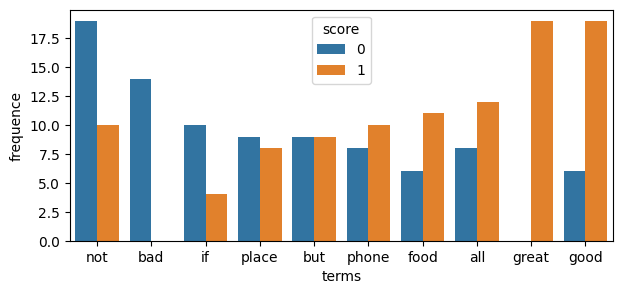

In [ ]:
# chose top5 words in each score
id_0_1 = max_freq_id_score[0][:5]+max_freq_id_score[1][4::-1]
item_name = count_vect.get_feature_names_out()[id_0_1].tolist()
print("the choose words:", item_name)
freq = term_freq_score[0][id_0_1].tolist()+term_freq_score[1][id_0_1].tolist()
# plot
dfs = pd.DataFrame(data={'terms': item_name*2, 'frequence': freq, 'score':[0]*10+[1]*10 })
plt.subplots(figsize=(7, 3))
sns.barplot(x='terms', y='frequence', hue='score', data=dfs)
plt.show()

###Tf-IDF

In [ ]:
# create the vector for Tf-IDF
tv = TfidfVectorizer(stop_words=stopword2)
tv_fit = tv.fit_transform(total_data.text)
print("the words:",tv.get_feature_names_out())
display(tv_fit.toarray())

the words: ['00' '10' '100' ... 'zillion' 'zombie' 'zombiez']


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

###Naive Bayes classifier

In [ ]:
# create test data
indexes = sample_data.id_org.tolist()
testdata_id = np.delete(np.array(range(0,len(total_data))), indexes)
len_pred=len(testdata_id)
ans_score=total_data.loc[testdata_id].score.tolist()
ans_label=total_data.loc[testdata_id].label.tolist()

####TF-IDF features

In [ ]:
# train the TFIDF model
tv = TfidfVectorizer(stop_words=stopword2)
tv_fit = tv.fit_transform(sample_data.text)
x = tv_fit.toarray()

# predict "score"
y=sample_data["score"].array
mnb = MultinomialNB()
mnb.fit(x, y)
pred_score=mnb.predict(tv.transform(total_data.loc[testdata_id].text))
pred_wrong_s=[i for i in range(len_pred) if pred_score[i]!=ans_score[i]]
print("TF_IDF_score_acc:", (len_pred-len(pred_wrong_s))/len_pred)

# predict "label"
y=sample_data["label"].array
mnb = MultinomialNB()
mnb.fit(x, y)
pred_label=mnb.predict(tv.transform(total_data.loc[testdata_id].text))
pred_wrong_l=[i for i in range(len_pred) if pred_label[i]!=ans_label[i]]
print("TF_IDF_label_acc:", (len_pred-len(pred_wrong_l))/len_pred)

TF_IDF_score_acc: 0.6984246061515379
TF_IDF_label_acc: 0.6946736684171043


####word frequency features

In [ ]:
# train the CounterVector() model
count_vect = CountVectorizer()
sample_counts = count_vect.fit_transform(sample_data.text)
x=sample_counts

# predict "score"
y=sample_data["score"].array
mnb = MultinomialNB()
mnb.fit(x, y)
pred=mnb.predict(count_vect.transform(total_data.loc[testdata_id].text))
pred_wrong_s=[i for i in range(len_pred) if pred[i]!=ans_score[i]]
print("acc:", (len_pred-len(pred_wrong_s))/len_pred)

# predict "label"
y=sample_data["label"].array
mnb = MultinomialNB()
mnb.fit(x, y)
pred=mnb.predict(count_vect.transform(total_data.loc[testdata_id].text))
pred_wrong_l=[i for i in range(len_pred) if pred[i]!=ans_label[i]]
print("acc:", (len_pred-len(pred_wrong_l))/len_pred)

acc: 0.6939234808702176
acc: 0.7220555138784697


####compare plot

In [ ]:
# set the parameters
train_frac=[0.1, 0.3, 0.5, 0.7, 0.9]
seed=[23,46,67]
feature=["tfidf","freq"]
classifier=["score","label"]

In [ ]:
#train the model and predict
acc_rec=[]
acc_score_0=[]
acc_score_1=[]
acc_label_1=[]
acc_label_2=[]
acc_label_3=[]
for f in train_frac:
  for s in seed:
    train = total_data.sample(frac=f,random_state=s).reset_index(names=['id_org'])
    test = total_data.drop(train.id_org)
    len_pred=len(test)
    n=len(train)
    #ans
    ans_score=test.score.tolist()
    ans_label=test.label.tolist()
    for feat in feature:
      if feat=="tfidf": #tf-idf
        model_vec=TfidfVectorizer(stop_words=stopword2)
        x = model_vec.fit_transform(train.text).toarray()
      elif feat=="freq": #word_frequency
        model_vec = CountVectorizer()
        x = model_vec.fit_transform(train.text)
      #score
      y=train["score"].array
      mnb = MultinomialNB()
      mnb.fit(x, y)
      pred=mnb.predict(model_vec.transform(test.text))
      correct=[a for p,a in zip(pred,ans_score) if p==a]
      #print("train_num:",n ,feat,"_score_acc:", acc/len_pred)
      acc_rec.append(len(correct)/len_pred)
      acc_score_0.append(correct.count(0)/ans_score.count(0))
      acc_score_1.append(correct.count(1)/ans_score.count(1))
      #label
      y=train["label"].array
      mnb = MultinomialNB()
      mnb.fit(x, y)
      pred=mnb.predict(model_vec.transform(test.text))
      correct=[a for p,a in zip(pred,ans_label) if p==a]
      acc_rec.append(len(correct)/len_pred)
      acc_label_1.append(correct.count(1)/ans_label.count(1))
      acc_label_2.append(correct.count(2)/ans_label.count(2))
      acc_label_3.append(correct.count(3)/ans_label.count(3))

,frac,state,feature,class_name,acc
0,0.1,23,tfidf,score,0.704758
17,0.3,46,tfidf,label,0.801541
34,0.5,67,freq,score,0.797033
51,0.9,23,freq,label,0.905724


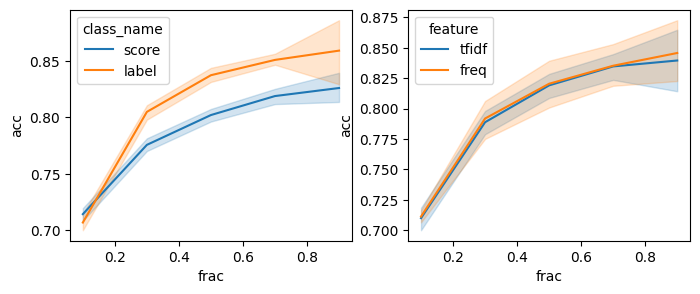

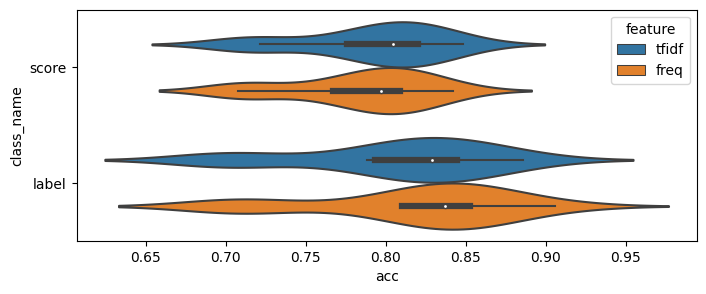

In [ ]:
#create acc dataframe
df=[]
for f in train_frac:
  for s in seed:
    for feat in feature:
      for c in classifier:
        df.append([f,str(s),feat,c])
acc_data = pd.DataFrame(df, columns=["frac","state","feature","class_name"])
acc_data["acc"]=acc_rec
display(acc_data[::17])
#plot
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(8, 3), gridspec_kw={"width_ratios": [1, 1]})
sns.lineplot(x='frac', y='acc', hue='class_name', data=acc_data, ax=ax1)
sns.lineplot(x='frac', y='acc', hue='feature', data=acc_data, ax=ax2)
plt.figure(figsize=(8,3))
sns.violinplot(x='acc', y='class_name', hue='feature', data=acc_data);

小結論：在樣本數低的情況，score 比較容易辨識，但隨著 frac 提升，label 的辨識率正確率明顯比 score 更高。tfidf 在 score 的辨識中，比 word frequency 的效果更好，但在 label 辨識中正好相反。

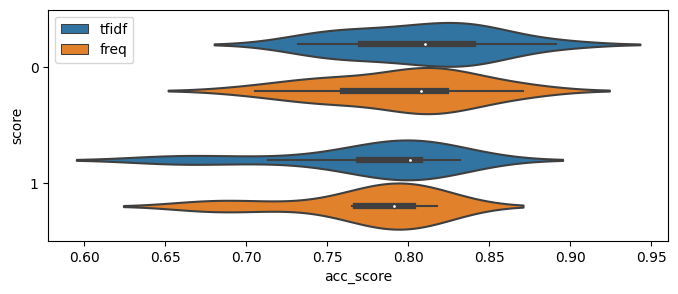

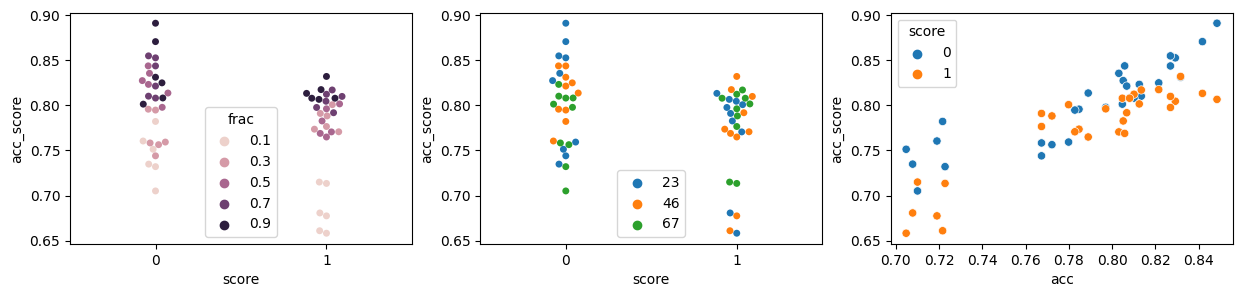

In [ ]:
# create the accuracy of score dataframe
acc_score = acc_data.loc[acc_data['class_name']=="score",["frac","state","feature","acc"]]
acc_score = pd.concat([acc_score, acc_score])
acc_score["score"]=['0']*30+['1']*30
acc_score['acc_score']=acc_score_0+acc_score_1
# plot
plt.figure(figsize=(8,3))
sns.violinplot(x='acc_score', y='score', hue="feature", data=acc_score, legend=False);
plt.legend(loc="upper left")

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15, 3), gridspec_kw={"width_ratios": [1,1,1]}, sharey=False)
sns.swarmplot(x='score', y='acc_score', hue="frac", data=acc_score, ax=ax1)
sns.swarmplot(x='score', y='acc_score', hue="state", data=acc_score, ax=ax2, legend=True)
sns.scatterplot(x='acc', y='acc_score', hue="score", data=acc_score, ax=ax3, legend=True)
ax2.legend(loc="lower center")

小結論：1被誤判的機率比0高很多。隨著sample的frac上升，正確率逐漸提高。

,frac,state,feature,acc,label,acc_label
1,0.1,23,tfidf,0.693518,yelp,0.792090
39,0.7,23,freq,0.853933,yelp,0.882353
17,0.3,46,tfidf,0.801541,imdb,0.861152
55,0.9,46,freq,0.828283,imdb,0.838710
33,0.5,67,tfidf,0.830074,amazon_cells,0.845041


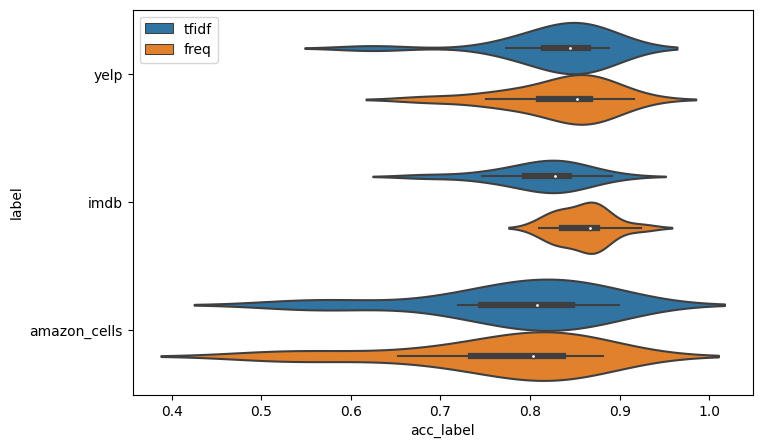

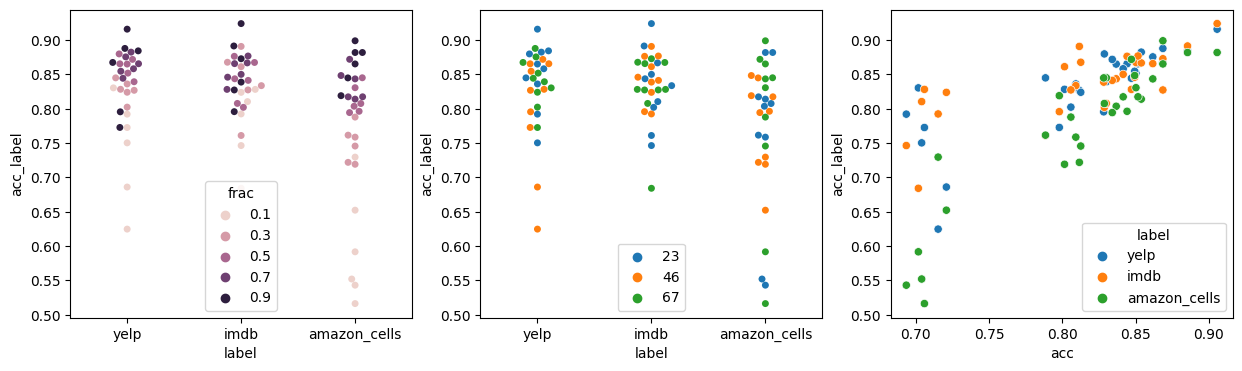

In [ ]:
#create the accuracy of label dataframe
acc_label = acc_data.loc[acc_data['class_name']=="label",["frac","state","feature","acc"]]
acc_label = pd.concat([acc_label, acc_label, acc_label])
acc_label["label"]=['yelp']*30+['imdb']*30+['amazon_cells']*30
acc_label["acc_label"]=acc_label_1+acc_label_2+acc_label_3
display(acc_label.iloc[::19])
#plot
plt.figure(figsize=(8,5))
sns.violinplot(x='acc_label', y='label', hue='feature', data=acc_label);
plt.legend(loc="upper left")

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15, 4), gridspec_kw={"width_ratios": [1,1,1]}, sharey=False)
sns.swarmplot(x='label', y='acc_label', hue="frac", data=acc_label, ax=ax1)
sns.swarmplot(x='label', y='acc_label', hue="state", data=acc_label, ax=ax2, legend=True)
sns.scatterplot(x='acc', y='acc_label', hue="label", data=acc_label, ax=ax3, legend=True)
ax2.legend(loc="lower center")


小結論：amazon_cells的誤判率最高，imdb 的誤判率最低。隨著sample的frac上升，以及總準確率(acc)的上升，每個label的正確率都有提高。

##part4

1). bin_label is useful, but it doesn't be used in this analyze and Naive Bayes classifier.

2). Because bag of words is sparse matrix, subset selection by random 10 documents is ineffectient, most of them are 0s. It can be replaced by sum of the some doucuments(not only one document) be a new document, the frequence will be more meaningful.(part3)

3). There are some outliers in the plot of 2D or 3D dimension, which makes other points too concentrated.

4). Tf-IDF isn't a good choice for Naive Bayes classifier, because the fraction of train data will effect IDF.

---